<a href="https://colab.research.google.com/github/jackiezeng01/MachineLearning_Fall2021/blob/main/Assignment_02a_Companion_2021f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Module 1 (Fall 2021)

# Assignment 02a Companion Notebook (first notebook)

You've already trained and tested some machine learning models in Matlab! Now you'll try them in Python! We're so excited it's exclamation! points! everywhere!

# Iris classification revisited
The iris dataset is so famous in machine learning, it's a standard, and comes with Python's most popular machine learning library, sklearn. Let's import that and plot it. This is slightly different than the noisy dataset you were working with earlier.

Text(0, 0.5, 'Sepal width')

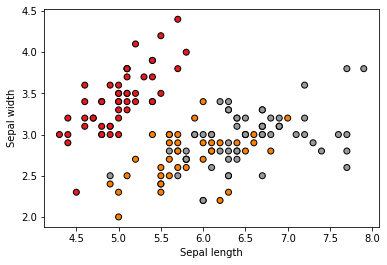

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data  # This convention of X for the data, and 
y = iris.target #y for the target, is common in ML

# Plot the training points
# note we're only plotting two of several features!
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

We'll need to divide the dataset into training and testing sets. We use the training to teach the machine learning model how to classify, then we use the testing set to see how well our machine learning model learned. 

Sklearn has a [built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for this.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

A few notes here. If you read the comments up above, you'll already know that there's a machine learning convention of using X for your features (data) and y for your results (target) that we are following here. This function split the input data into two parts (`X_train`, `X_test`) and the results into two parts (`y_train`, `y_test`). The test sample is about a third of the whole dataset (`test_size=0.33`) and although the data has been divided randomly, we've done it with a fixed random state (`42`) so that no matter how many times you run this cell, the data are divided the same way. This reproducibility is useful as you learn how the code works.

Now, we're going to train a simple decision tree model. Please look at [the documentation](https://scikit-learn.org/stable/modules/tree.html) to learn what each variable means.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

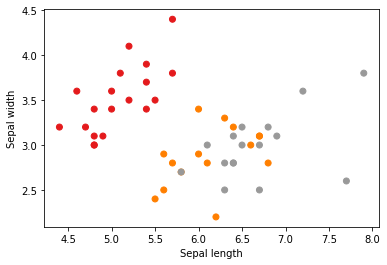

In [ ]:
from sklearn import tree
#Define the model to have three clusters, and train the model on the training data.
clf = tree.DecisionTreeClassifier(min_samples_leaf=3) # minimum number of samples requires to be @ leaf node
#Train the model
clf = clf.fit(X_train, y_train)
#Now take the fitted model and apply it to the test set.
y_pred_tree_test=clf.predict(X_test)

#Plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_tree_test, cmap=plt.cm.Set1)
# Uncomment this if you want to directly compare the test data to the output of the decision tree
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1, marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

### *Notebook Exercise 1 (15 minutes)*
Please consider the following questions.

(a) Why does this second plot have fewer points? 
* Because we're only plotting the test data and previously we were plotting everything

(b) Can you tell if this classification was accurate, just from the information in this notebook so far?
* It looks pretty accurate when I look at the trends of the training points. 

(c) Where did the classification work well? Where did it not work well?
* The orange and grey dots seem a bit jumbled, but that was also the case in the training set, so can't blame this too much.

####***Expand for Solution***


(a) It has fewer points becasue it is just the testing set, which is 33% of the total number of points.

(b) You can compare the colors of the second plot's points to the first plot's points. Where the colors match, the machine learning worked well. Where they are different, the machine learning did not accurately predict the results.

(c) The red dots look good. It's a little tricky to tell, but it looks like some of the gray and gold points were hard for the algorithm to distinguish. 

### *Notebook Exercise 2 (15 minutes)*

Calculate the accuracy of the model on the training and testing data separately.

*Hint: You will need to run the model again with X_train as the input to get y_pred_tree_train.*

In [ ]:
y_pred_tree_test = clf.predict(X_test)
y_pred_tree_train = clf.predict(X_train)

test_accuracy = np.sum(y_pred_tree_test == y_test)/np.shape(y_pred_tree_test)
train_accuracy = np.sum(y_pred_tree_train == y_train)/np.shape(y_pred_tree_train)

train_accuracy

array([0.96])

####***Expand for Solution***

In [ ]:
y_pred_tree_train=clf.predict(X_train)
train_accuracy = np.sum(y_pred_tree_train == y_train)/np.shape(y_pred_tree_train)
test_accuracy = np.sum(y_pred_tree_test == y_test)/np.shape(y_pred_tree_test)
print('Train accuracy: \n',train_accuracy)
print('Test accuracy: \n',test_accuracy)

Train accuracy: 
 [0.96]
Test accuracy: 
 [1.]


# You try!

### *Notebook Exercise 3 (30 minutes)*

Above, we imported a dataset, split it into training and testing sets, and trained a simple machine learning algorithm on it. We'd like you to repeat those three steps here, using a different dataset. At each step, take the time to carefully check what you are doing. This might mean making extra plots, or printing out sections of the data. If you are confused, ask a classmate or an instructor or course assistant to help (either in person, via email, or on discord).

In [ ]:
# We'll get you started by importing another commonly used dataset. 
# This one deals with different characteristics of different types of wine.
# From: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset
wine = datasets.load_wine()

X = wine.data
y = wine.target

# split into test and train groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

# Train the model on just the training set
clf = tree.DecisionTreeClassifier(min_samples_leaf=3) # clf == classifier
clf = clf.fit(X_train, y_train)

# Predict on the test set
y_pred_test = clf.predict(X_test)

# Check accuracy of the test set
test_accuracy = np.sum(y_pred_test == y_test)/np.shape(y_pred_test)

test_accuracy

array([0.96610169])

# ***Expand for Solution***

Text(0, 0.5, 'Malic Acid')

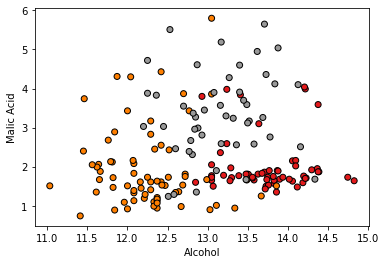

In [ ]:
# For this, I chose to preserve the X, y, convention for variables.
X = wine.data  
y = wine.target

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')

Text(0, 0.5, 'Malic Acid')

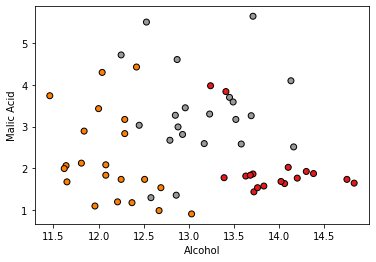

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=77)
clf = tree.DecisionTreeClassifier(min_samples_leaf=10)
#Train the model
clf = clf.fit(X_train, y_train)
#Now take the fitted model and apply it to the test set.
y_pred_tree=clf.predict(X_test)

#Plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')

# Challenge Problem
Up next is a totally optional challenge problem, for those who would like it. You may skip it entirely. For those who are interested, consider,
1. We only have been plotting two features (for example, sepal length vs. sepal width). But these datasets are multi-dimensional. How could you better visually represent the data? Think of a better way to represent the data, and implement it.
2. In this example, we used a decision tree with just one parameter, `min_samples_leaf`. Explore the model by automating a way to check model accuracy vs values of `min_samples_leaf`, or by expanding the number of model parameters used (check the documentation for details).